# TWITTER SENTIMENT ANALYSIS<a href="#TWITTER-SENTIMENT-ANALYSIS" class="anchor-link">¶</a>

In \[1\]:

    #Import The Libraries

    import tweepy
    from textblob import TextBlob
    from wordcloud import WordCloud
    import pandas as pd
    import numpy as np
    import re
    import matplotlib.pyplot as plt
    plt.style.use('fivethirtyeight')

In \[2\]:

    #Twiiter API Credentials
    consumer_key='upfKUy2c9LhKgdgfnAw79iSuS'
    consumer_secret='cLJeNBLXyJlvMX2AjuU34bk3IxE121Lch5GdxaYxWZxacCgMX9'
    Access_token='2408071466-EBv6lNcBLZY3AVl5S5oiBRHpNPztWa5EQczMV1v'
    Access_secret='9xpdiQAnOCa63dzNOdahfCbIPp4c2rMA0q1REnKQoOWo8'

In \[3\]:

    #Create the authentication object
    authenticate = tweepy.OAuthHandler(consumer_key,consumer_secret)

    # Set the access token and access secret
    authenticate.set_access_token(Access_token,Access_secret)

    #Create the API object while passing in the auth information

    api = tweepy.API(authenticate, wait_on_rate_limit = True)

# SNAPDEAL REVIEWS<a href="#SNAPDEAL-REVIEWS" class="anchor-link">¶</a>

In \[4\]:

    # Extract 200 Tweets from the twitter user 

    posts = api.user_timeline(screen_name = "Snapdeal", count=200,lang = "en",tweet_mode="extended")

    #Print the Last 5 Tweets from the Account

    print("Show the 5 recent Tweets: \n")
    i=1
    for tweet in posts[0:5]:
        print(str(i) + ')'+tweet.full_text + '\n')
        i=i+1

    Show the 5 recent Tweets: 

    1)RT @1kunalbahl: कम कीमत में बेहतर वैल्यू का वादा, भारत का अपना बाजार है Snapdeal

    @snapdeal

    https://t.co/KJhiwToX2q

    2)⌚️ Watch of the day!
    Buy now:  https://t.co/eXmOSWRq2u
    #ShopFromYourHome https://t.co/W4TZP3uJkX

    3)Drink your way to your new body. 
    🤗 https://t.co/X8SzalFVsh
    #ShopFromYourHome https://t.co/9Ly9GXINCU

    4)These SUPER GLOVES are an essential item for every household task.
    Buy Now: https://t.co/beY1lxPAYI

    #ShopFromyourHome https://t.co/VYEgB2v1XE

    5)Last Day Today! Exciting deals with up to 80% off on electronics, home, fashion, and daily needs products! 
    Visit: https://t.co/XPcwl8slB5 #KumMeinDum #Offers https://t.co/Rpxbtxbq48

In \[5\]:

    # Create a Dataframe With a column called  Tweets
    df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

    #Show the First 5 rows of Data
    df.head()

Out\[5\]:

|     | Tweets                                             |
|-----|----------------------------------------------------|
| 0   | RT @1kunalbahl: कम कीमत में बेहतर वैल्यू का वा...  |
| 1   | ⌚️ Watch of the day!\\nBuy now: https://t.co/e...  |
| 2   | Drink your way to your new body. \\n🤗 https://t... |
| 3   | These SUPER GLOVES are an essential item for e...  |
| 4   | Last Day Today! Exciting deals with up to 80% ...  |

In \[6\]:

    #Clean the Text

    def cleantxt(text):
        text=re.sub(r'@[A-Za-z0-9]+','',text )# Removed @mentions
        text=re.sub(r'#','',text )#Removed # Symbols
        text=re.sub(r'RT[\s]','',text )#Removing RT
        text=re.sub(r'https?:\/\/\S+','',text )#Remove the Hyperlink
        return text
        
    #Cleaning the text 
    df['Tweets']=df['Tweets'].apply(cleantxt)

    #Show the Cleaned text

    df

Out\[6\]:

|     | Tweets                                              |
|-----|-----------------------------------------------------|
| 0   | : कम कीमत में बेहतर वैल्यू का वादा, भारत का अप...   |
| 1   | ⌚️ Watch of the day!\\nBuy now: \\nShopFromYour...  |
| 2   | Drink your way to your new body. \\n🤗 \\nShopFro... |
| 3   | These SUPER GLOVES are an essential item for e...   |
| 4   | Last Day Today! Exciting deals with up to 80% ...   |
| ... | ...                                                 |
| 195 | Meet the perfect home for your shoes! 👟\\nBuy N...  |
| 196 | Keep your phone flying high on power with this...   |
| 197 | Ensure a good night sleep for your little one ...   |
| 198 | Whatever your style, we’ve got a timepiece for...   |
| 199 | Stay home, stay safe!\\nJantaCurfewMarch22          |

200 rows × 1 columns

## Subjectivity & Polarity<a href="#Subjectivity-&amp;-Polarity" class="anchor-link">¶</a>

In \[7\]:

    #Create  a function to get the Subjectivity
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    # Create a Function to get the Polarity

    def getpolarity(text):
        return TextBlob(text).sentiment.polarity

    # Create two new columns
    df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
    df['Polarity']=df['Tweets'].apply(getpolarity)

    #Show the new dataframe with new Columns
    df

Out\[7\]:

|     | Tweets                                              | Subjectivity | Polarity |
|-----|-----------------------------------------------------|--------------|----------|
| 0   | : कम कीमत में बेहतर वैल्यू का वादा, भारत का अप...   | 0.000000     | 0.000000 |
| 1   | ⌚️ Watch of the day!\\nBuy now: \\nShopFromYour...  | 0.000000     | 0.000000 |
| 2   | Drink your way to your new body. \\n🤗 \\nShopFro... | 0.454545     | 0.136364 |
| 3   | These SUPER GLOVES are an essential item for e...   | 0.483333     | 0.166667 |
| 4   | Last Day Today! Exciting deals with up to 80% ...   | 0.216667     | 0.100000 |
| ... | ...                                                 | ...          | ...      |
| 195 | Meet the perfect home for your shoes! 👟\\nBuy N...  | 1.000000     | 1.000000 |
| 196 | Keep your phone flying high on power with this...   | 0.540000     | 0.160000 |
| 197 | Ensure a good night sleep for your little one ...   | 0.420000     | 0.222500 |
| 198 | Whatever your style, we’ve got a timepiece for...   | 0.000000     | 0.000000 |
| 199 | Stay home, stay safe!\\nJantaCurfewMarch22          | 0.500000     | 0.625000 |

200 rows × 3 columns

## Word Cloud<a href="#Word-Cloud" class="anchor-link">¶</a>

In \[8\]:

    #Plot the word cloud

    allwords= ' '.join([twts for twts in df['Tweets']])
    wordcloud=WordCloud(width = 500, height=300,random_state=21,max_font_size=119).generate(allwords)

    plt.imshow(wordcloud,interpolation = "bilinear")
    plt.axis('off')
    plt.show()

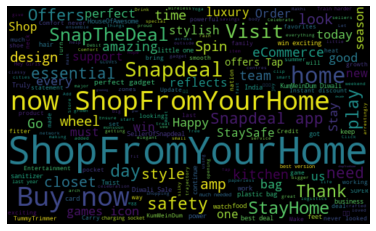

In \[9\]:

    #Create Funtion to compute the negative,neutral and positive analysis
    def getanalysis(score):
        if score < 0:
            return 'Negative'
        elif score ==0:
            return 'Neutral'
        else:
            return 'Positive'
    df['Analysis']=df['Polarity'].apply(getanalysis)

    #Show the dataframe
    df

Out\[9\]:

|     | Tweets                                              | Subjectivity | Polarity | Analysis |
|-----|-----------------------------------------------------|--------------|----------|----------|
| 0   | : कम कीमत में बेहतर वैल्यू का वादा, भारत का अप...   | 0.000000     | 0.000000 | Neutral  |
| 1   | ⌚️ Watch of the day!\\nBuy now: \\nShopFromYour...  | 0.000000     | 0.000000 | Neutral  |
| 2   | Drink your way to your new body. \\n🤗 \\nShopFro... | 0.454545     | 0.136364 | Positive |
| 3   | These SUPER GLOVES are an essential item for e...   | 0.483333     | 0.166667 | Positive |
| 4   | Last Day Today! Exciting deals with up to 80% ...   | 0.216667     | 0.100000 | Positive |
| ... | ...                                                 | ...          | ...      | ...      |
| 195 | Meet the perfect home for your shoes! 👟\\nBuy N...  | 1.000000     | 1.000000 | Positive |
| 196 | Keep your phone flying high on power with this...   | 0.540000     | 0.160000 | Positive |
| 197 | Ensure a good night sleep for your little one ...   | 0.420000     | 0.222500 | Positive |
| 198 | Whatever your style, we’ve got a timepiece for...   | 0.000000     | 0.000000 | Neutral  |
| 199 | Stay home, stay safe!\\nJantaCurfewMarch22          | 0.500000     | 0.625000 | Positive |

200 rows × 4 columns

## Positive Tweets<a href="#Positive-Tweets" class="anchor-link">¶</a>

In \[10\]:

    #Print All the Positive Tweets
    j=1
    sortedDF=df.sort_values(by=['Polarity'])
    for i in range(0,sortedDF.shape[0]):
        if(sortedDF['Analysis'][i] == 'Positive'):
            print(str(j)+')'+sortedDF['Tweets'][i])
            print()
            j=j+1

    1)Drink your way to your new body. 
    🤗 
    ShopFromYourHome 

    2)These SUPER GLOVES are an essential item for every household task.
    Buy Now: 

    ShopFromyourHome 

    3)Last Day Today! Exciting deals with up to 80% off on electronics, home, fashion, and daily needs products! 
    Visit:  KumMeinDum Offers 

    4)Buy perfect appliances for your Kitchen from our 
    KumMeinDum Diwali sale -  
    Offers 

    5)Go bigger on savings with our KumMeinDum Diwali Sale! Get 10% Instant discount using   Credit &amp; Debit cards - 
    Offers 

    6)Get the latest in technology at an unbelievable price. 💻
    Visit:   
    KumMeinDum Offers 

    7)Go bigger on savings with our KumMeinDum Diwali Sale! Get 15% Instant discount on  Credit &amp; Debit Cards. Visit: 
    Offers 

    8)For the best deals, Check Snapdeal Now!
    Visit: 
    KumMeinDum offers 

    9)1⃣ day to go for the KumMeinDuM Diwali Sale.
    StayTuned Offers 

    10)Spin the wheel to win exciting offers! Tap on the games icon on the Snapdeal app and play “Spin the Wheel”.
    Visit:  
    Offers 

    11)Comfort never looked this good!
    Buy now: 
    ShopFromYourHome 

    12)For the perfect moment to make you more special. 😍
    Buy now: 
    ShopFromYourHome 

    13)Perfect for celebrations. 😎
    👉 
    ShopFromYourHome 

    14): Ecommerce major  has expanded its logistics network in Punjab by opening two new centres in Jalandhar and Ludhian…

    15)A perfect gadget for your kitchen.
    Buy now: 
    ShopFromYourHome 

    16)For silky smooth hair.  😍
    Buy Now: 
    ShopFromYourHome 

    17)Twist and win! Play this exciting yet addictive "Tower Twist" game on the Snapdeal App and play for free. Visit:   
     Entertainment 

    18)Its a classic look! This style is a must have and a statement in itself. 
    Buy now: 
    ShopFromYourHome 

    19)🤟 A great looking portable speaker with POWERFUL sound.
    👉 
    ShopFromYourHome 

    20)😎 Trendy and stylish designs for you!
    Shop now: 

    ShopFromYourHome 

    21)Looking for a perfect sling bag? 
    Buy now: 
    ShopFromYourHome 

    22)Comfort never looked this good!
    👉 
    ShopFromYourHome 

    23)Just one look wouldn’t hurt. Click here  to get this sleek, stylish, and on-the-go LaptopBag.
    ShopFromYourHome 

    24)Carry your own charging socket in your pocket! 🔋
    Get it now:  

    ShopFromyourHome 

    25)An arrestingly powerful design.
    👉 ⌚️ 
    ShopFromYourHome 

    26): Best inspiration one could get after reading everything about   while making SD2.0. Your each struggle…

    27)Stay elegant and classy. 😍
    👉 
    ShopFromYourHome 

    28)Thanks for believing in us, we owe our success to you! HappyTeachersDay 

    29)Train harder. Get fitter. Be the best version of yourself. TummyTrimmer
    Buy now: 
    ShopFromYourHome 

    30): Great to be spending time with our  customers - now virtually given the pandemic. Met Aditya from Ranchi today - a…

    31)It’s time for pretty pookalams, delicious sadhyas &amp; bright deepams. Snapdeal wishes you all a very Happy Onam!
    HappyOnam 

    32)Add some amazing styles to your closet! 😍
    👉 
    ShopFromYourHome 

    33)Make your ankle more desirable and attractive with this beautifully crafted Anklet. ♥️ 
    ShopFromYourHome 

    34)This plastic bag clip is fit for different kinds of plastic bags, milk powder bags, food bags and so on.
    Buy now: 

    ShopFromYourHome 

    35): Ecommerce major Snapdeal added eight logistics centres to its network across manufacturing hubs, including Mathura, Noida…

    36)Happy GaneshChaturthi 

    37)😍 Your closet has a need to own this look!
    Buy now:  
    ShopFromYourHome 

    38)A perfect gadget for your kitchen.
    Buy now: 

    ShopFromYourHome 👩‍🍳👨‍🍳 

    39)Comfort never looked this good!
    Buy now: 
    ShopFromYourHome 

    40)Happy 74th Independence Day. 🇮🇳

    IndependenceDayIndia 

    41): Extremely impressed with the fast service of  team. Thanks for making it such a smooth return process. Uve truel…

    42)May this Janmashtami Lord Krishna give you all the love, joy, peace &amp; happiness! HappyJanmashtami krishnajanmashtami 🙏 

    43)Carry your own charging socket in your pocket! 🔋
    Get it now:  

    ShopFromyourHome 

    44)Train harder. Get fitter. Be the best version of yourself. TummyTrimmer
    Buy now: 
    ShopFromYourHome 

    45)Stay elegant and classy. 😍
    👉 
    ShopFromYourHome 

    46)Spin the wheel to win exciting offers! Tap on the games icon on the Snapdeal app and play “Spin the Wheel”. 
    Visit:   
    Offers 

    47)A perfect gadget for your kitchen.
    Buy now: 

    ShopFromYourHome 👩‍🍳👨‍🍳 

    48)Wishing you all a very Happy Raksha Bandhan! 🙂
    HappyRakshaBandhan 

    49)Smell the rain, and feel the winds! This season fill your monsoon days with joy of rain by getting these must haves from our Monsoon Store. 🌧️🌧️
    🌦️🌦️ 
    AwesomeDeals ShopFromYourHome 

    50)_am_PercyJ: Thank You very much .
    You delivered my brother's gift 3 days before time and that too after only one request.
    Kud…

    51)😍 Your closet has a need to own this look!
    Buy now: 
    ShopFromYourHome 

    52)😍 Your closet has a need to own this look!
    Buy now:  
    ShopFromYourHome 

    53): We are proud  to be creating job opportunities outside the big cities.

    Talent is everywhere and eCommerce is goin…

    54):  Thank you so much for Marathi language option... मराठी सेवा दिल्याबद्दल धन्यवाद ...  _bo…

    55):  loved this small change in UI 👑 

    56)Celebrate Rakhi with your loved ones! 😃
    Click  for Rakhi special offers.

    ShopFromYourHome 

    57)Snip herbs in perfectly sized pieces right onto plates and pans.
    👉 
    ShopFromYourHome 

    58)Train harder. Get fitter. Be the best version of yourself. TummyTrimmer
    Buy now: 
    ShopFromYourHome 

    59)For amazing support and comfort to your feet.
    👉 
    ShopFromYourHome 

    60)Add some super cool styles to your closet at min 55% off.
    👉 
    ShopFromYourHome 

    61)Spin the wheel to win exciting offers! Tap on the games icon on the Snapdeal app and play “Spin the Wheel”. 
    👉   Offers 

    62)“Teamwork, discipline and motivation are the winning strokes,” cricketer  shares life lessons with Team Snapdeal.
    Firesidechat LearningFromLeaders HouseOfAwesome 

    63)For silky smooth hair.  😍
    👉 
    ShopFromYourHome 

    64)Experience royalty in every step, with these stylish and comfortable pair of  Juttis. 🤗  
    ShopFromYourHome 

    65)Meet the perfect home for your shoes! 👟
    Buy Now: 
    ShopFromYourHome 

    66)Store your eggs safely and keep fresh with this egg storage box! 🥚🥚
    👉 

    ShopFromYourHome 

    67)Ensure a good night sleep for your little one with this amazing blue coloured baby bedding set with attached mosquito net. 👶👼
    👉 

    ShopFromYourHome 

    68)Celebrating the untiring superhuman for all the days he made into a celebration. Happy Father's Day!

    HappyFathersDay 

    69)"We have grown 200% more than last year and hope that with continued hard work and support from Snapdeal, we will continue on our growth trajectory".  SellerOfSnapdeal


    70)For amazing support and comfort to your feet.
    👉 
    ShopFromYourHome 

    71)Neck Jams? Get the best deal on this amazing neck massager. 
    👉 
    ShopFromYourHome 

    72)Style your hair to create gorgeous looks every day! 
    😍 
    ShopFromYourHome 

    73)Drink your way to your new body. 
    🤗 
    ShopFromYourHome 

    74)Get the best deal on these fast charging cables and chargers. 👉 

    ShopFromYourHome 

    75)Getting a new hairstyle never got this easier and quicker.
    Visit: 

    ShopFromYourHome 

    76)Yoga se Hoga. Get the best deal on this 6 mm thick Yoga Mat. 
    🧘‍♀️🧘‍♂️ 

    ShopFromYourHome StayFit 

    77)A perfect gadget for your kitchen.
    Buy now: 

    ShopFromYourHome 

    78)This plastic bag clip is fit for different kinds of plastic bags, milk powder bags, food bags and so on.
    Buy now: 

    ShopFromYourHome 

    79)These SUPER GLOVES are an essential item for every household task.
    Buy Now: 

    ShopFromyourHome 

    80)New touch to your bathroom’s décor.
    Buy now:  
    ShopFromYourHome 

    81)A watch that's truly smart! 😎
    👉 
    ShopFromYourHome 

    82)Read the inspiring story of a young school teacher turned entrepreneur who decided to follow her passion. Visit: 

    SellerOfSnapdeal Entrepreneurship 

    83)Carry your own charging socket in your pocket! 🔋
    Get it now:  

    ShopFromyourHome 

    84)A decade of enabling India’s small businesses to grow big, grow digital. Snapdeal. Proudly Indian 🇮🇳 vocalforlocal  AatmanirbharBharat 

    85)🐶Order food, supplement &amp; more for your loving four legged friend from the safety of your home. 🐕
    👉 
    StaySafe  ShopFromYourHome 

    86)Start your day with these little shots of good health! 🙂
    👉 
    StayHome ShopFromyourHome 

    87) Thanks a lot. You made our day ☺️

    88)_shilpi Proud and happy to serve India! Stay home, stay safe. Thanks for shopping from us.

    89): Got much needed hand wash and sanitizer today. Thank you   🙏

    90): Appreciate MHA's guideline on opening eCommerce for all categories outside Red Zones. It is now important for all eCommerce…

    91)@_TheDigitalGuy: Got a few much needed grooming essentials today. My caveman look should get over soon. Thanks . My family is v…

    92)Shuffle and pick a card to win prizes!  Tap on the game icon on the Snapdeal app and play “Shuffle and Win”. 
    👉  

    93)Spin the wheel to win exciting offers! Tap on the games icon on the Snapdeal app and play “Spin the Wheel”. 
    👉   Offers 

    94)Play and win! Tap on the games icon on the Snapdeal app and play Stack Up now! FunGames 

    95)Twist and win! Play this exciting yet addictive "Tower Twist" game on the Snapdeal App and play for free. Entertainment 

    96)Download the Snapdeal App and watch your favorites movies, originals and more - 
    StayHome 

    97): eCommerce reach is much wider than that.  alone had over 30 Million people transact in the last 12 months and near…

    98): CompaniesThatCare
      - committed to supporting India in its fight against the CoronavirusPandemic!
    Visit https:/…

    99): Our team has been doing a lot of interesting things to keep the team engaged and productive while working from home. Sharin…

    100)The entire team at Snapdeal is contributing one day’s salary to the PMCARES fund. We will also continue to find more ways to help those in need  🇮🇳 

    101): Excellent discussion today between Hon'ble CIM  and the industry about how to get eCommerce back on track and f…

    102): Social distancing can't keep us away. SDians are always connected! HouseOfAwesome  StayHome 

    103)It's time for the little ones to have some fun with this dancing robot with flashing lights. 👉 
    SnapTheDeal 

    104)A watch that's truly smart! 😎
    Buy now: 
    SnapTheDeal 

    105): Really appreciate the speed, collaboration and compassion with which law enforcement authorities are working with the eComm…

    106)An arrestingly powerful design.
    👉 ⌚️ 
    SnapTheDeal 

    107)A perfect gadget for your kitchen. 👩‍🍳👨‍🍳
    👉 
    SnapTheDeal 

    108)"We have grown 200% more than last year and hope that with continued hard work and support from Snapdeal, we will continue on our growth trajectory".  SellerOfSnapdeal


    109)Glam up every outfit with this stylish Shoe.
    👉 
    SnapTheDeal 

    110)Want to workout and look stylish? 💪
    👉 
    SnapTheDeal 

    111)An amazing gadget to enhance house decoration better.
    👉 
    SnapTheDeal 

    112)Give your back and neck a much needed respite from constantly working on laptops with this multi-purpose laptop stand. 👩‍💻
    👨‍💻 
    SnapTheDeal 

    113)Meet the perfect home for your shoes! 👟
    Buy Now: 
    SnapTheDeal 

    114)Keep your phone flying high on power with this high capacity power bank.
    🔋🔋 
    SnapTheDeal 

    115)Ensure a good night sleep for your little one with this amazing blue coloured baby bedding set with attached mosquito net. 👶👼
    👉 
    SnapTheDeal 

    116)Stay home, stay safe!
    JantaCurfewMarch22 

## Negative Tweets<a href="#Negative-Tweets" class="anchor-link">¶</a>

In \[11\]:

    # Print the negative tweets
    j=1
    sortedDF=df.sort_values(by=['Polarity'],ascending=False)
    for i in range(0,sortedDF.shape[0]):
        if(sortedDF['Analysis'][i] == 'Negative'):
            print(str(j)+')'+sortedDF['Tweets'][i])
            print()
            j=j+1

    1)Little designer wear harmed nobody! 😍
    Buy now: 
    ShopFromYourHome 

    2)😎 Time to treat you with a flat 70% off on sunglasses.
    Buy now: 

    ShopFromyourHome 

    3)No more tears and endless chopping of vegetables. 🤩
    👩‍🍳👨‍🍳 
    ShopFromYourHome 

    4)All for your little one! 👶 👼 
    👉 

    StayHome ShopFromYourHome 

    5)Bored of early man look? Order your favorites grooming essentials from the safety of your home. 
     👉 
    StayAtHome ShopFromYourHome 

    6)Shop from the safety of your home 🏠. We are now delivering all products in orange and green zones and only essentials in red zones as per government guidelines.
    Visit:  
    StayHome  shopfromhome 

    7)_shilpi: I had stopped ordering from Snapdeal last year. Recently purchased handwash and a few other essentials for my home. Pleas…

    8): Tough Times, Tougher Startups 

In \[12\]:

    # Plot the Polarity and Subjectivity
    plt.figure(figsize=(8,6))
    for i in range(0,df.shape[0]):
        plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
        
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()

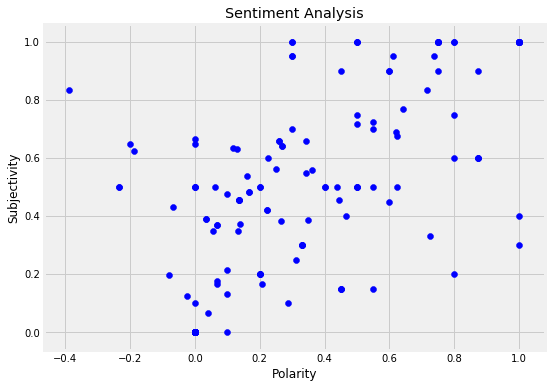

In \[13\]:

    #Get the percentage of Positive Tweets

    Postweets = df[df.Analysis =='Positive']
    postweets = Postweets['Tweets']
    round((postweets.shape[0]/df.shape[0])*100,1)

Out\[13\]:

    58.0

In \[14\]:

    #Get the percentage of Negative Tweets
    Negtweets = df[df.Analysis =='Negative']
    negtweets = Negtweets['Tweets']
    round((negtweets.shape[0]/df.shape[0])*100,1)

Out\[14\]:

    4.0

In \[15\]:

    # Show the Value counts
    df['Analysis'].value_counts()

    #plot and Visualize the Counts
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.show()

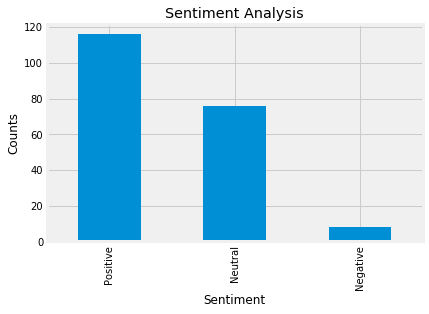

# AMAZON REVIEWS<a href="#AMAZON-REVIEWS" class="anchor-link">¶</a>

In \[16\]:

    # Extract 200 Tweets from the twitter user 

    posts = api.user_timeline(screen_name = "Amazon", count=200,lang = "en",tweet_mode="extended")

    #Print the Last 5 Tweets from the Account

    print("Show the 5 recent Tweets: \n")
    i=1
    for tweet in posts[0:5]:
        print(str(i) + ')'+tweet.full_text + '\n')
        i=i+1

    Show the 5 recent Tweets: 

    1)@couldvebeencth ❤️ 😊 ❤️

    2)@brittnayyy____ Looks like your parents snailed it! 🐌 Have you come up with another other costume idea yet or are you using this shell-arious idea? 😆

    3)@sirenaboricua11 Sounds yummy! 🍲 🥘 We'd love to help make sure you don't run out of ideas! If you're interested, please send us your details using this secure link: https://t.co/H3YB7nDVXT.

    4)We love seeing how crafty you all get with upcycling your Amazon 📦 for Halloween!

    Check out some of these DIY #boxtumes for inspo and share your creations with us 👻 😊 https://t.co/ajyzLCV1vL

    5)@JessieKAshley We're thrilled to hear you enjoyed it! Thanks for taking the time to share your experience with us!

In \[17\]:

    # Create a Dataframe With a column called  Tweets
    df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

    #Show the First 5 rows of Data
    df.head()

Out\[17\]:

|     | Tweets                                                |
|-----|-------------------------------------------------------|
| 0   | @couldvebeencth ❤️ 😊 ❤️                               |
| 1   | @brittnayyy\_\_\_\_ Looks like your parents snaile... |
| 2   | @sirenaboricua11 Sounds yummy! 🍲 🥘 We'd love t...     |
| 3   | We love seeing how crafty you all get with upc...     |
| 4   | @JessieKAshley We're thrilled to hear you enjo...     |

## Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>

In \[18\]:

    #Clean the Text

    def cleantxt(text):
        text=re.sub(r'@[A-Za-z0-9]+','',text )# Removed @mentions
        text=re.sub(r'#','',text )#Removed # Symbols
        text=re.sub(r'RT[\s]','',text )#Removing RT
        text=re.sub(r'https?:\/\/\S+','',text )#Remove the Hyperlink
        return text
        
    #Cleaning the text 
    df['Tweets']=df['Tweets'].apply(cleantxt)

    #Show the Cleaned text

    df

Out\[18\]:

|     | Tweets                                                |
|-----|-------------------------------------------------------|
| 0   | ❤️ 😊 ❤️                                               |
| 1   | \_\_\_\_ Looks like your parents snailed it! 🐌 Hav... |
| 2   | Sounds yummy! 🍲 🥘 We'd love to help make sure...      |
| 3   | We love seeing how crafty you all get with upc...     |
| 4   | We're thrilled to hear you enjoyed it! Thanks...      |
| ... | ...                                                   |
| 195 | Please accept our apologies for this delayed ...      |
| 196 | \_ We're so happy we could be there for you! 😊        |
| 197 | Introducing Amazon’s first custom electric del...     |
| 198 | We're happy to hear we're keeping the magic a...      |
| 199 | \_potatoes This paws-itively adorable picture i...    |

200 rows × 1 columns

## Subjectivity & Polarity<a href="#Subjectivity-&amp;-Polarity" class="anchor-link">¶</a>

In \[19\]:

    #Create  a function to get the Subjectivity
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    # Create a Function to get the Polarity

    def getpolarity(text):
        return TextBlob(text).sentiment.polarity

    # Create two new columns
    df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
    df['Polarity']=df['Tweets'].apply(getpolarity)

    #Show the new dataframe with new Columns
    df

Out\[19\]:

|     | Tweets                                                | Subjectivity | Polarity  |
|-----|-------------------------------------------------------|--------------|-----------|
| 0   | ❤️ 😊 ❤️                                               | 0.000000     | 0.000000  |
| 1   | \_\_\_\_ Looks like your parents snailed it! 🐌 Hav... | 0.375000     | -0.125000 |
| 2   | Sounds yummy! 🍲 🥘 We'd love to help make sure...      | 0.647222     | 0.443750  |
| 3   | We love seeing how crafty you all get with upc...     | 0.750000     | 0.500000  |
| 4   | We're thrilled to hear you enjoyed it! Thanks...      | 0.533333     | 0.491667  |
| ... | ...                                                   | ...          | ...       |
| 195 | Please accept our apologies for this delayed ...      | 0.000000     | 0.000000  |
| 196 | \_ We're so happy we could be there for you! 😊        | 1.000000     | 1.000000  |
| 197 | Introducing Amazon’s first custom electric del...     | 0.319444     | 0.250000  |
| 198 | We're happy to hear we're keeping the magic a...      | 0.787500     | 0.606250  |
| 199 | \_potatoes This paws-itively adorable picture i...    | 0.716667     | 0.283333  |

200 rows × 3 columns

## Word Cloud<a href="#Word-Cloud" class="anchor-link">¶</a>

In \[20\]:

    #Plot the word cloud

    allwords= ' '.join([twts for twts in df['Tweets']])
    wordcloud=WordCloud(width = 500, height=300,random_state=21,max_font_size=119).generate(allwords)

    plt.imshow(wordcloud,interpolation = "bilinear")
    plt.axis('off')
    plt.show()

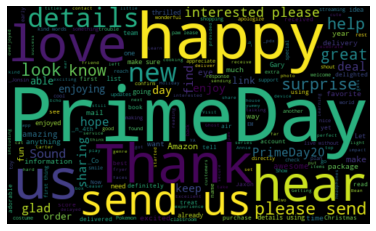

In \[21\]:

    #Create Funtion to compute the negative,neutral and positive analysis
    def getanalysis(score):
        if score < 0:
            return 'Negative'
        elif score ==0:
            return 'Neutral'
        else:
            return 'Positive'
    df['Analysis']=df['Polarity'].apply(getanalysis)

    #Show the dataframe
    df

Out\[21\]:

|     | Tweets                                                | Subjectivity | Polarity  | Analysis |
|-----|-------------------------------------------------------|--------------|-----------|----------|
| 0   | ❤️ 😊 ❤️                                               | 0.000000     | 0.000000  | Neutral  |
| 1   | \_\_\_\_ Looks like your parents snailed it! 🐌 Hav... | 0.375000     | -0.125000 | Negative |
| 2   | Sounds yummy! 🍲 🥘 We'd love to help make sure...      | 0.647222     | 0.443750  | Positive |
| 3   | We love seeing how crafty you all get with upc...     | 0.750000     | 0.500000  | Positive |
| 4   | We're thrilled to hear you enjoyed it! Thanks...      | 0.533333     | 0.491667  | Positive |
| ... | ...                                                   | ...          | ...       | ...      |
| 195 | Please accept our apologies for this delayed ...      | 0.000000     | 0.000000  | Neutral  |
| 196 | \_ We're so happy we could be there for you! 😊        | 1.000000     | 1.000000  | Positive |
| 197 | Introducing Amazon’s first custom electric del...     | 0.319444     | 0.250000  | Positive |
| 198 | We're happy to hear we're keeping the magic a...      | 0.787500     | 0.606250  | Positive |
| 199 | \_potatoes This paws-itively adorable picture i...    | 0.716667     | 0.283333  | Positive |

200 rows × 4 columns

## Positive Tweets<a href="#Positive-Tweets" class="anchor-link">¶</a>

In \[22\]:

    #Print All the Positive Tweets
    j=1
    sortedDF=df.sort_values(by=['Polarity'])
    for i in range(0,sortedDF.shape[0]):
        if(sortedDF['Analysis'][i] == 'Positive'):
            print(str(j)+')'+sortedDF['Tweets'][i])
            print()
            j=j+1

    1) Sounds yummy! 🍲 🥘 We'd love to help make sure you don't run out of ideas! If you're interested, please send us your details using this secure link: 

    2)We love seeing how crafty you all get with upcycling your Amazon 📦 for Halloween!

    Check out some of these DIY boxtumes for inspo and share your creations with us 👻 😊 

    3) We're thrilled to hear you enjoyed it! Thanks for taking the time to share your experience with us!

    4) What a great PrimeDay score! Do you know what you're cooking first in your new Instant Pot?

    5)_alvaa We love you too! Thanks for sharing the 💗!

    6) We're happy we could be here for you! 👻 🎃 🤖 What are you going to be this year?

    7) If you don't receive your order by the 23rd as stated, please contact us directly here:  and we'll be happy to look into the issue for you. ^CN

    8) Sounds like hot stuff! We'd love to help you prepare for your next dutch oven meal! If you're interested, please send us your information using this secure link: 

    9) We'd love to make sure Ceaser gets some early trick or treats! 🎃 If you're interested, paw-lease send us your details using this link:  🐾

    10) Thanks for hanging out with us on PrimeDay! Have you been able to use your new dutch oven yet? 🥧 🍞 🥘

    11) What a great name! What does Ceaser enjoy doing for fun? 🐶

    12)“The impact of solving this, not only for Amazon, but for the total community is huge.”

    This new exclusive series looks at the teams that established onsite COVID-19 testing for Amazon’s front-line employees to keep them safe.

    👉  

    13) We're so happy that Annie was able to be our guest in the surprise as well! 🌹 We're glad we could deliver smiles to both Jaxon and Annie! 😍

    14) What an awesome costume idea! We'd love to help make it strange and unusual! 😉 🎃 If you're interested, please send us your details using this link: 

    15) We're happy you found a granola you're nuts about!

    16)_PE We think Carter is already an amazing delivery guy because he's delivered smiles to our faces! 😊🚚📦 If Carter could deliver something to himself, what would it be?

    17)We've joined up with TurboVote to provide a place where you can find out more about voter registration, voting by mail, confirming you’re registered to vote, details about your polling location, and important date reminders. Visit  to get started. 

    18) You're so welcome!! We're glad to hear we were able to make your day. ❤️🤗 Now for the hard decisions... which one to read first... 🤔😅

    19) Thank you very much! We hope you enjoy the rest of the day!

    20) We're happy we could help you complete your costume! What are you going to be this year?

    21) It's great to hear you find the delivery photo cool! 📦 📸

    22) We're thrilled to see how happy Jaxon was with his surprise, and it looks like he has given us a thumbs up! 👍 Thank you so much for sharing this with us! 🥰

    23)_bears 📃 You are welcome. 🎈

    24) We're glad you're enjoying the Holiday Wish Book!

    25)_Mrs This journey was just plane awesome and exciting! Getting to be your passengers aboard the terrific flight of learning was so much fun! ✈️🌎💕

    26) That's an amazing PrimeDay haul! It looks like you'll definitely be able to keep in touch with everyone in the house. 😍 We'd love to hear how it's working out for you so far?

    27)_IDoAdore We're glad to hear you're enjoying your new Echo Show 8 from PrimeDay! Do you have a favorite skill or routine? Tell us about it. 😊

    28)_Kane We're overjoyed we could help brighten up your day. 📖 💗 It's wonderful to hear your students will love the new reading material!

    29) ☕ Words cannot espresso how grateful we are for your shout-out! Thanks a latte for enjoying PrimeDay with us! ☕

    30) We're excited you had fun carving your own AR pumpkin! 🎃

    31)_Co We're honored that one of our gifts has become his new favorite toy! Please pass on some extra pets to Gary and Bean for us! 🤗 💓

    32)_Co Gary looks so happy! Thank you for sharing these adorable pictures with us. 💗 We're glad Bean got a new box too! 📦

    33) We're so happy Chester's surprise was delivered! We hope he enjoys it! 🐶

    34) We're glad to hear it! 😍 Enjoy, and thanks again for sharing PrimeDay with us. ❤️

    35) You'll have to keep us posted on where your alliances lie when you finish the series! We'd like to send some surprises your way to celebrate your PrimeDay order. If you're interested, please send your details to us here: 

    36) We're happy the blanket is helping you stay cozy! 💗 Thank you for being so thoughtful!

    37)_n_4th Your tweet warmed our hearts! 💗 We're delighted we could help support your classroom! 🍪 🥨

    38) We're thrilled Squeakers is pleased about the PrimeDay surprise!

    39) We're excited you and Ernie are enjoying the package!

    40)_b That sounds like such a fun find! 🎲 👍 Have you had a chance to play it yet?

    41)Serving major best friend goals! 🙌 

    Now every kid can find their perfect  match ▶️  

    42) Those are some awesome choices! 🏎️ 🏁 Jaxon has really put a smile on our faces, and we'd love to send him a surprise that'll have him grinning from ear to ear! 😊 If you'd like, please send us your details here: 

    43) We apologize for the delayed response! Thank you for sharing your favorites! 😊 We'd like to send you a surprise for talking books with us. ❤️ If you're interested, please send us your details here: 

    44) Excellent PrimeDay order! Which house are you rooting for in the game? 🤔

    45) Thank you for the kind words. 😍 Have a great day! 😊

    46) We're glad to hear you're enjoying the service! Thanks for the kind words. 😊 🍇🍎🍞📦 💨

    47) These two are the absolute cutest! 💗

    48) Wouldn't that be the sweetest?! 🍦 🍨 What other treats do you and Brooklyn enjoy?

    49) We hope you enjoy your new headphones!

    50)_pdx Ghost sounds like a lot of fun! We'd love furry much to send him a back up PrimeDay surprise! If you're interested, please send us your details here: 

    51)_pdx Looks like Ghost enjoyed PrimeDay pig time! 🐷 🐶 What other toys does he like to play with?

    52) Thanks for giving Upload a shout-out! It's great to hear you enjoyed streaming it! 🎦 🍿

    53) It's a brew-tiful day! 🍵 ☕ We're so glad you're enjoying your new light up kettle!

    54)_b This is what we love to hear! 🥰 Do you mind sharing with us, what's your most favorite find?

    55) Time for some arts and crafts! What's the first thing you plan on making with your PrimeDay purchase?

    56) We're excited we could make your PrimeDay extra special! 💗

    57) Your new recorder looks nice! And, we need to know. 🤔 What's Leia amused by? 🐶 💗

    58)_n_4th Please keep an eye on your e-mails for updates. We hope you enjoy the rest of the day! ☀️

    59)@_elemge We're happy to hear that PrimeDay made you happy! 😀 👍

    60) Your set-up looks great! 🖥️ We're thrilled you were able find the perfect mount on PrimeDay!

    61) We'd love to add some new titles to your classroom collection. 🍎 📚 💗 Please keep an eye on your deliveries!

    62) We glove this so much! ⚾ ❤️ We'd like to send some extra baseballs and make sure you get something special for being so kind! If you're interested, please send us your information here: 

    63) We'd love to help him with his purrrsuits! If you're interested, please send us your details using this link:  😸 💗

    64)_kiely Better than Christmas!? What PrimeDay items are you most excited about?

    65) How adorable! 🐈 Besides box inspections, what else does your cat like to do for fun? 📦

    66)_n_4th It's so amazing to hear that you have such a wonderful support system! We'd love to show you our support by sending a snack-tastic surprise your way! If you're interested, please send us your details here: 

    67)Small businesses make a big impact. We're investing to help them grow and reach more customers. Learn more:  

    68)_n_4th What a great PrimeDay purchase! Do you have anything left on your classroom list?

    69) We love you too!

    70) Happy reading! 📚

    71) Your new galaxy light is out of this world! 🌌 💫 🌜

    72) You'd want to send us your details (along with any deals you were looking for), using the link provided above. Please let us know once your information has been submitted; we want to make sure that we receive it! 😀

    73)_Ngo Thanks for sharing your experience with the Kindle Oasis! We're delighted you're enjoying your new device!

    74)_ Thanks for shouting out Amazon Fresh! We appreciate you!

    75) We're glad to hear you're enjoying your Echo Show 5! Happy listening! 😊

    76) Aren't the best kinds of surprises free? Of course! 🥰

    77)_ Now we need to know! Were you able to remember what you wanted to buy on PrimeDay?

    78) We're delighted to hear you got two new cases on PrimeDay!

    79)_t An air fryer!? Nice! What's the first thing you plan on air frying?

    80)To all our teams on the road, in the air, and all over the world - thank you for making PrimeDay a success for customers everywhere. 

    See you next year! 😊 

    81) Purrrchases this cute, aren't returnable! 😸 We hope you'll furrrgive us! 💗

    82) This is what we love to hear!

    83) Happy streaming! 🎥 🍿

    84) It's great to hear you enjoyed PrimeDay! Did you find anything you couldn't live without?

    85) You're on top of it! ☃️ 🎁 We're happy PrimeDay could help you cross off half of your shopping list! ✔️

    86)_____ We're glad you had a great time on PrimeDay! Were you able to score any deals?

    87) It's a bummer you didn't find any deals you couldn't live without! We'd still like to send you a PrimeDay surprise! If you're interested, let us know your details (including the deals you were shopping for) here: 

    88) Oooh, YA historical fiction is such a fun genre! 😍 Did you read any this year that would fall in the favorites' category?

    89) What a cute photo on delivery! 📦 😸 📸

    90) Your new headphones look awesome! 🎧 We're happy to hear you're enjoying them already! PrimeDay

    91)_Co We're glad Gary is so excited! Paw-lease keep an eye on your e-mails for any updates! 🐾 💗

    92) Now, that's a cool mouse! Great PrimeDay choice!

    93)_Co Sounds like Gary is living the dream! We'd love to send another package to keep him on duty. 📦 If you're interested, please send us your details using this link: 

    94)_Co Gary looks like the best boy! What does he enjoy doing when he's not on the look out for packages? 💗 🐶

    95):  prime day makes me happy.

    96) you make us happy! 💙

    97) Please keep an eye on your e-mails for updates! We hope you enjoy the rest of PrimeDay!

    98) Wow, you sound like a great friend, and an avid reader! 📚 Any particular book genres/titles that you've had your eye on? 👀

    99) We're thrilled you and Kira are both feline good about PrimeDay! 😸 📦

    100)_rn Sounds like you found some amazing PrimeDay savings! 👍 😊 Were you able to find anymore awesome deals on your list?

    101) You make us happy! Thanks for sharing the 💗!

    102) That's totally a fun purchase! 😊 We'd love to keep the excitement going for PrimeDay by sending you a little surprise! If you'd like, please send us your details here: 

    103) Squeaks of approval? How adorable! We'd be overjoyed to send Keana a special PrimeDay package. If you're interested, please send us your information using this link: 

    104) We want to help you be the very best, like no one ever was. 🎶 If you're interested, please send us your details (and your favorite starter Pokemon) here:  😊

    105) We love that you love PrimeDay!

    106) Excellent PrimeDay score!! 😊 Are you after a particular Pokemon right Meowth? 🤔😉

    107) Thank you! Happy PrimeDay to you, too! 😊 Were you able to find some awesome deals?

    108) We know the feeling! So you don't have to wait, please send us your details for an early Christmas surprise: 

    109) We'd like to thank the head of the cat council for her approval! 😸 + 📦 = 💗 What's this pretty kitty's name?

    110) Don't keep us waiting! If it's not too forward, do you want to tell us what your sweet score was? 😀

    111) That PrimeDay purchase doesn't suck! We'd love to help welcome your new Roomba. If you're interested, please send us your details here: 

    112) What's the first thing you plan on cooking in your new air fryer?

    113) We can confirm we've received it! 😻 Happy PrimeDay! 🎉

    114)Look at them go! PrimeDay orders heading to your doorstep. We're ready for day ✌️!

    Thank you to all of our teams across the globe. 🙏 

    115) We want to make sure Pixel gets a PrimeDay package to unbox! When you have time, paw-lease send us your details here:  🐾 😸

    116) What a cutie! We'd love to send some more PrimeDay treats your way! If you're interested, please send us your details here: 

    117) Very nice! Are there any items left on your PrimeDay20 list?

    118)_Jonsin Okay, good -- you already know you're about to get sucked into a good story. 😊😂 We'd love to send you a surprise to celebrate your new device! If you'd enjoy that, please send us your details (including your favorite colors) here:  PrimeDay

    119)_Jonsin Very cool! Have you read the other books from that literary world?

    120)_Rawks Happy PrimeDay to you, too! 🥳

    121) Thank you for letting us know. We would definitely advise to contact us directly through the link provided to you by ^EM at your nearest convenience. ^ML

    122)_NoCrossHair That's a fancy chair! It's great to hear you're enjoying it already!

    123) We certainly appreciate you and your kind words! 😊 Thanks for sharing!

    124)_porche We're so happy to hear that you had a great PrimeDay! Thanks for sharing! 😊

    125) Happy gaming! 🖥️ 🖱️ 😊

    126)Spread the joy! 💙📦🤗 

    127) You're on top of it! 🎄 🎁 PrimeDay20

    128) Same to you! We hope you had an amazing PrimeDay! 😊

    129)_hughe That's what we love to hear! Thanks for the shout-out, and happy PrimeDay!

    130) That does sound exciting! 🎙️ Happy streaming, and happy PrimeDay! 😊

    131) We're glad you were able to get some awesome deals on PrimeDay20!

    132) This is wonderful to hear! We hope you've had an amazing PrimeDay! 😊

    133)_dev Here's to learning more about yourself!

    134)_Diaz Happy PrimeDay! 😊

    135) Sounds like you've had an amazing PrimeDay! 😊

    136)_ Thanks for sharing the 💗 for PrimeDay20!

    137) Happy PrimeDay20! 💜 💛

    138) We're delighted to hear you enjoyed watching The Boys! 🎥 🍿

    139) Sounds like you're prepared! 🎄 ❄️ 🎁 ☃️ Happy Primeday20!

    140) Happy early birthday! 🥳 What did you get you? 😂

    141) Have you found anything you can't live without so far?

    142) That's what we love to hear! 🥰 We hope you have a happy PrimeDay!

    143) Right back at ya! 🥰 PrimeDay

    144): To all the teams around the 🌎 making PrimeDay happen today and tomorrow - you are the true definition of teamwork. Thank…

    145) 🎹 This sounds like a grand idea! PrimeDay20 🎹

    146) Happy PrimeDay20! Have you treated yourself to anything yet?

    147) Sounds like you're prepared! How old is Riley turning this year?

    148) Happy PrimeDay20 to you!

    149)_Jonsin Woohoo!! 😁 What are you going to read first? 🤔📚

    150) We're happy that you're happy for PrimeDay!

    151) It's here! 🙌 Happy PrimeDay!

    152) We're glad to hear you're excited! 😍 Happy primeday!

    153) We love to hear that you're loving it! 💕 Happy PrimeDay!

    154) So much room for activities!! 😍😂

    155)Set yourself up for Prime Day success by turning on Deal Notifications in the Amazon App:  

    156) We're happy we could be there for you! 😊

    157) (1/2) Thanks for the information, and for letting us know about this. We apologize again for the trouble it's caused. If you'd like to have a member of our Operations team take another look at this for you, we'd be happy to send your information over to them.

    158)Henry, a Senior Transportation Manager, is driving Amazon towards a sustainable future. He's discovering new ways to help Amazon decarbonize one delivery at a time. See Henry's story:  

    159)_ We're so happy we could be there for you! 😊

    160)Introducing Amazon’s first custom electric delivery vehicle. 🚚 Designed and built in partnership with . ClimatePledge 

    Learn more about the future of zero emissions delivery:  

    161) We're happy to hear we're keeping the magic alive! 😍✨📦💨 Have a great day! 😊

    162)_potatoes This paws-itively adorable picture is definitely a treat for our eyes! 😍 🐾 Can you tell us what's this sweet one's name?

## Negative Tweets<a href="#Negative-Tweets" class="anchor-link">¶</a>

In \[23\]:

    # Print the negative tweets
    j=1
    sortedDF=df.sort_values(by=['Polarity'],ascending=False)
    for i in range(0,sortedDF.shape[0]):
        if(sortedDF['Analysis'][i] == 'Negative'):
            print(str(j)+')'+sortedDF['Tweets'][i])
            print()
            j=j+1

    1)____ Looks like your parents snailed it! 🐌 Have you come up with another other costume idea yet or are you using this shell-arious idea? 😆

    2)Get everyday essentials auto-delivered AND save up to 15%? Um, yes please!  

    3) Searching for toys is serious business; everything else has to take a back seat! 😄 🧸 🎁 What are some must-haves that Jaxon's spotted for this holiday season?

    4)_of_Chelsea: Thank you  ! Last year's was getting a little worn! He has cherished this prize possession and peruses it daily…

    5)Did you know you can shop PrimeDay deals from small businesses around the country? Find curated lists to shop from here ▶️  

    6) We know it's hard to choose, but we appreciate you narrowing it down. 😍 We can confirm we've received your details. Thanks for talking Pokemon with us, and sharing your PrimeDay order. 😊

    7) Hi there. We're sorry for the trouble with your account. Have you received any e-mails from our account specialists? You can reach us directly without signing in to your account here:  Let us know if you need more help. ^EM

    8) Nothing wrong with some adulting! ☺️📦

    9) Oh no! We apologize for the trouble. We're unable to confirm the carrier service, as we don't have access to personal account details. Can you tell us which carrier delivered this? You can find this info when selecting, "Track Package" on the order details. Let us know! ^KM

    10) We're so sorry for the delay! For further assistance, please go to your Job Page,  to check on your status or see if any action is needed. If you have any questions, please visit  for chat or phone options. We hope this helps! ^KY

## Scatter Plot<a href="#Scatter-Plot" class="anchor-link">¶</a>

In \[24\]:

    # Plot the Polarity and Subjectivity
    plt.figure(figsize=(8,6))
    for i in range(0,df.shape[0]):
        plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
        
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()

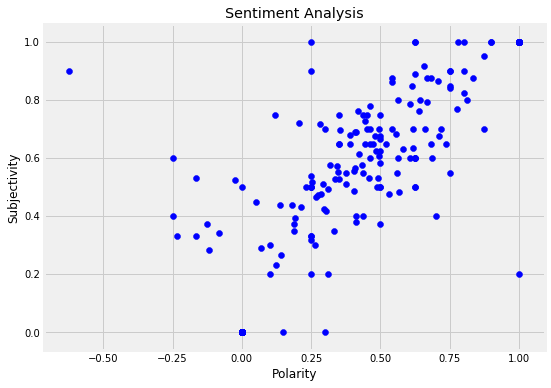

In \[25\]:

    #Get the percentage of Positive Tweets

    Postweets = df[df.Analysis =='Positive']
    postweets = Postweets['Tweets']
    round((postweets.shape[0]/df.shape[0])*100,1)

Out\[25\]:

    81.0

In \[26\]:

    #Get the percentage of Negative Tweets
    Negtweets = df[df.Analysis =='Negative']
    negtweets = Negtweets['Tweets']
    round((negtweets.shape[0]/df.shape[0])*100,1)

Out\[26\]:

    5.0

In \[27\]:

    # Show the Value counts
    df['Analysis'].value_counts()

    #plot and Visualize the Counts
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.show()

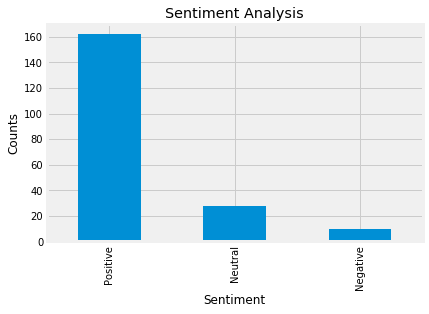

# FLIPKART REVIEWS<a href="#FLIPKART-REVIEWS" class="anchor-link">¶</a>

In \[28\]:

    # Extract 200 Tweets from the twitter user 

    posts = api.user_timeline(screen_name = "Flipkart", count=200,lang = "en",tweet_mode="extended")

    #Print the Last 5 Tweets from the Account

    print("Show the 5 recent Tweets: \n")
    i=1
    for tweet in posts[0:5]:
        print(str(i) + ')'+tweet.full_text + '\n')
        i=i+1

    Show the 5 recent Tweets: 

    1)RT @FlipkartStories: People, partnerships, innovations, and everything else that makes #TheBigBillionDays a festive event that's truly #For…

    2)Congratulations to Reeshin Chaurasia on winning a double up on your shopping cart at the #BigBillionLoot contest. #TheBigBillionDays https://t.co/fA9LBkOT3A

    3)RT @FlipkartStories: #News: @Flipkart’s #TheBigBillionDays brings festive cheer like never before for MSMEs &amp; consumers across India
    - 666…

    4)RT @FlipkartStories: Crafted with care and close attention to detail by a team of engineers, designers, and researchers, @Flipkart's #Voice…

    5)RT @FlipkartStories: "For a generation that’s always on the move &amp; considers multitasking their superpower, waiting for essentials is not a…

In \[29\]:

    # Create a Dataframe With a column called  Tweets
    df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

    #Show the First 5 rows of Data
    df.head()

Out\[29\]:

|     | Tweets                                              |
|-----|-----------------------------------------------------|
| 0   | RT @FlipkartStories: People, partnerships, inn...   |
| 1   | Congratulations to Reeshin Chaurasia on winnin...   |
| 2   | RT @FlipkartStories: \#News: @Flipkart’s \#TheBi... |
| 3   | RT @FlipkartStories: Crafted with care and clo...   |
| 4   | RT @FlipkartStories: "For a generation that’s ...   |

## Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>

In \[30\]:

    #Clean the Text

    def cleantxt(text):
        text=re.sub(r'@[A-Za-z0-9]+','',text )# Removed @mentions
        text=re.sub(r'#','',text )#Removed # Symbols
        text=re.sub(r'RT[\s]','',text )#Removing RT
        text=re.sub(r'https?:\/\/\S+','',text )#Remove the Hyperlink
        return text
        
    #Cleaning the text 
    df['Tweets']=df['Tweets'].apply(cleantxt)

    #Show the Cleaned text

    df

Out\[30\]:

|     | Tweets                                             |
|-----|----------------------------------------------------|
| 0   | : People, partnerships, innovations, and every...  |
| 1   | Congratulations to Reeshin Chaurasia on winnin...  |
| 2   | : News: ’s TheBigBillionDays brings festive ch...  |
| 3   | : Crafted with care and close attention to det...  |
| 4   | : "For a generation that’s always on the move ...  |
| ... | ...                                                |
| 195 | \_amarnath To get the special offer, try BigBil... |
| 196 | To get the special offer, try BigBillionDays ...   |
| 197 | To get the special offer, try BigBillionDays ...   |
| 198 | To get the special offer, try BigBillionDays ...   |
| 199 | To get the special offer, try BigBillionDays ...   |

200 rows × 1 columns

## Subjectivity & Polarity<a href="#Subjectivity-&amp;-Polarity" class="anchor-link">¶</a>

In \[31\]:

    #Create  a function to get the Subjectivity
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    # Create a Function to get the Polarity

    def getpolarity(text):
        return TextBlob(text).sentiment.polarity

    # Create two new columns
    df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
    df['Polarity']=df['Tweets'].apply(getpolarity)

    #Show the new dataframe with new Columns
    df

Out\[31\]:

|     | Tweets                                             | Subjectivity | Polarity |
|-----|----------------------------------------------------|--------------|----------|
| 0   | : People, partnerships, innovations, and every...  | 0.000000     | 0.000000 |
| 1   | Congratulations to Reeshin Chaurasia on winnin...  | 0.375000     | 0.250000 |
| 2   | : News: ’s TheBigBillionDays brings festive ch...  | 0.000000     | 0.000000 |
| 3   | : Crafted with care and close attention to det...  | 0.000000     | 0.000000 |
| 4   | : "For a generation that’s always on the move ...  | 0.000000     | 0.000000 |
| ... | ...                                                | ...          | ...      |
| 195 | \_amarnath To get the special offer, try BigBil... | 0.571429     | 0.357143 |
| 196 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 |
| 197 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 |
| 198 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 |
| 199 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 |

200 rows × 3 columns

## Word Cloud<a href="#Word-Cloud" class="anchor-link">¶</a>

In \[32\]:

    #Plot the word cloud

    allwords= ' '.join([twts for twts in df['Tweets']])
    wordcloud=WordCloud(width = 500, height=300,random_state=21,max_font_size=119).generate(allwords)

    plt.imshow(wordcloud,interpolation = "bilinear")
    plt.axis('off')
    plt.show()

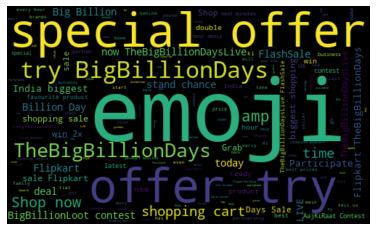

In \[33\]:

    #Create Funtion to compute the negative,neutral and positive analysis
    def getanalysis(score):
        if score < 0:
            return 'Negative'
        elif score ==0:
            return 'Neutral'
        else:
            return 'Positive'
    df['Analysis']=df['Polarity'].apply(getanalysis)

    #Show the dataframe
    df

Out\[33\]:

|     | Tweets                                             | Subjectivity | Polarity | Analysis |
|-----|----------------------------------------------------|--------------|----------|----------|
| 0   | : People, partnerships, innovations, and every...  | 0.000000     | 0.000000 | Neutral  |
| 1   | Congratulations to Reeshin Chaurasia on winnin...  | 0.375000     | 0.250000 | Positive |
| 2   | : News: ’s TheBigBillionDays brings festive ch...  | 0.000000     | 0.000000 | Neutral  |
| 3   | : Crafted with care and close attention to det...  | 0.000000     | 0.000000 | Neutral  |
| 4   | : "For a generation that’s always on the move ...  | 0.000000     | 0.000000 | Neutral  |
| ... | ...                                                | ...          | ...      | ...      |
| 195 | \_amarnath To get the special offer, try BigBil... | 0.571429     | 0.357143 | Positive |
| 196 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 | Positive |
| 197 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 | Positive |
| 198 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 | Positive |
| 199 | To get the special offer, try BigBillionDays ...   | 0.571429     | 0.357143 | Positive |

200 rows × 4 columns

## Positive Tweets<a href="#Positive-Tweets" class="anchor-link">¶</a>

In \[34\]:

    #Print All the Positive Tweets
    j=1
    sortedDF=df.sort_values(by=['Polarity'])
    for i in range(0,sortedDF.shape[0]):
        if(sortedDF['Analysis'][i] == 'Positive'):
            print(str(j)+')'+sortedDF['Tweets'][i])
            print()
            j=j+1

    1)Congratulations to Reeshin Chaurasia on winning a double up on your shopping cart at the BigBillionLoot contest. TheBigBillionDays 

    2)You saw the epic, groovy, super talented showdown and the results are in! Both teams put up a tough fight, and it was a close call. 
    The winners for today's Dance Battle, receiving vouchers worth Rs 10,000 are..... 
    Team Blue!!!
    Congratulations to all of you! TheBigBillionDays 

    3): From ensuring a sustainable income to finding a way back to a beloved hometown, our sellers tell us what eCommerce ha…

    4): PowerOfPartnership Hear from leaders of top Indian and international brands on why it matters to partner with …

    5)Bengaluru-based StoneSoup started just over 5 years ago with an aim to make sustainable living accessible to all. The eco-entrepreneurs found a way to empower women in village Self Help Groups across south India. Read on to know how this Flipkart Samarth partner does it!

    6)This just in! Get the best deals on your favourite products only on TheBigBillionDays 

    7)Lunch time = shopping time!
    Check out these gorgeous kurtas at flat 80% off 

    Shop now: 
    TheBigBillionDaysLive FlashSale 

    8)Last call to win double at The Big Billion Days Sale. Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. All you got to do is tell us what product excited you the most. T&amp;C -  

    9)India, this is your last chance to get the biggest deals on the best brands! TheBigBillionDays ends tonight!

    10)🏃🏻🏃🏻‍♀️ Stop waiting, start buying! The chance to win a FREE PHONE ends at midnight! TheBigBillionDaysLive

    11)Kya aap jaante hai? Flipkart ke TheBigBillionDays sale mein latest products are now available at the best prices. Hurry and visit the Flipkart's Big Billion Day sale. 

    12)Paaiye double khushiyan! Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. TheBigBillionDaysLive 

    13)Congratulations to Nitin Prakash Khetan on winning a double up on your shopping cart at the BigBillionLoot contest.  There's still plenty of time to shop and win! The contest will be on every day till the 21st. TheBigBillionDaysLive 

    14)Flipkart and vendor partner RuralShores are bringing job opportunities to the people of Bagepalli in Karnataka. This allows most of them to work from where they are instead of traveling to cities and struggling for a livelihood.

    15)With big dreams of taking his family business of textiles to new heights, Ankur Tulsian signed on to become a Flipkart seller. The new partnership helped him maintain a revenue stream even through challenging times. 

    16): TheBigBillionDays Working with  helped Shahanaz develop good people skills. Encouraged, she decided t…

    17): Sustainability is a top priority at  - we're dedicating our time, effort &amp; resources into GoingGreen. Both…

    18): From a sweet shop owner in Hissar to a provisions store manager in Bengaluru, 's kirana partners talk abou…

    19)Deals that make you go wow!

    FlashSale Flat 50% off on Wow Skin products until 5pm. Get it now: 
    TheBigBillionDaysLive

    20)⚠️Breaking News: Free phones! Just for today.
    TheBigBillionDaysLive

    21)Breaking News!
    Get the best deals on your favourite products only on TheBigBillionDays 

    22)Get double the savings at The Big Billion Days Sale. Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. All you got to do is tell us what product excited you the most. T&amp;C -  

    23)On the occasion of The Big Billion Days, here is a special message from Robert Kiyosaki the author of bestselling books like 'Rich Dad Poor Dad', 'Fake' &amp; "Second Chance'. Go grab a copy of his books at a special price under BBDSpecials.

    24)Aaj ki Taaza Khabar! TheBigBillionDays sale mein latest product at the best prices. Hurry and visit the Flipkart's Big Billion Day sale. 

    25)Ghar baithe shopping mein Double Dhamaka! Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. TheBigBillionDaysLive 

    26)WFH mantra: formal up top, comfy below 🩳
    Grab these casual shorts and track pants from Puma, Reebok &amp; more at under ₹599! 

    Get it before the offer ends at 9pm today!

    Shop now: 
    TheBigBillionDaysLive  FlashSale 

    27)👟 Superb shoes from French Connection, Ducati and other brands under ₹799! Only till 7pm today.
    Shop now: 
    FlashSale TheBigBillionDaysLive 

    28)Chitra Vyas turned to Flipkart to improve her sales, when her electronics business was not picking up online. Soon after, her business saw a surge in customer orders. Even when COVID-19 struck, she was able to adapt and thrive.

    29)Mujhe pehchano… main hu kaun?  😎 

    30)Working from home? Get rid of that hunched back with this winning FlashSale 

    Portable table at just ₹̷2̷4̷9̷9̷ ₹1,099 - until 3pm today only!

    Shop now: 
    TheBigBillionDaysLive 

    31): The early days, the hits and misses, the a-ha moments, and creating something as massive as TheBigBillionDays remotel…

    32): It's time to shop with love and give with love! This festive season, join  and  to help educate and…

    33)Get the best prices on your favourite products only on TheBigBillionDays 

    34)The countdown begins! ⏲️
    Get Aurelia Kurtas and Kurtis in under ₹299 only until 2pm today.

    Ready? Go!

    Shop Now: 
    TheBigBillionDaysLive  
    FlashSale 

    35): So many notifications! Why is everyone so excited about FlipkartForIndia? 🤔🤔🤔 

    36)We are seeing double at The Big Billion Days Sale. Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. All you got to do is tell us what product excited you the most. T&amp;C -  

    37)Grab a copy of the bestseller- 'Ikigai' by Francesc Miralles at a special price on The Big Billion Days. BBDSpecials

    38) No code required. A new FlashSale comes out every hour. Grab it while you can!

    39) Just missed it 🙊
    The sale ended at 1am. But we have new flash sales every hour. Stay tuned!

    40)Still awake?
    Make it worthwhile!
    Grab these Louis Philippe shirts and trousers under Rs 799 - only between 3am and 4am!

    Shop now: 
    TheBigBillionDaysLive FlashSale 

    41)Kids are about 70% smaller than adults, right? 
    So it makes sense to get them some trendy US Polo Association clothes at minimum 70% off, right?

    It’s possible for the next one hour only! Shop now: 

    FlashSale TheBigBillionDays 

    42)Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. TheBigBillionDaysLive 

    43)Komal Prasad Paul, a 33-year-old medical representative with disability, began a new life as a Flipkart seller. Under the banner of Ultimate Hygiene, he sells personal care products on Flipkart as a part of the Flipkart Samarth program.

    44)Home decor hack: Wallpapers aren't just for walls!

    Get awesome wallpapers for just ₹149 - only for the next 60 minutes with this FlashSale 

    Shop now: 
     TheBigBillionDaysLive 

    45)Tune out the world with this ridiculously good FlashSale - available for the next thirty minutes only! 
     
    Soundcore Life Q20 🎧Hybrid Active Noise Cancellation Bluetooth Headphones at Just ₹̷1̷1̷9̷9̷9̷ ₹4,999

    TheBigBillionDaysLive
    Shop now:  

    46): "It’s as much our company as it is anyone else’s." These incredible women say  is a workplace that embraces…

    47)FlashSale New Deals, Every Hour!
    Betty Crocker Pancake Mix at minimum 50% off for the next 60 minutes only! 🥞

    Get it now: 
    TheBigBillionDaysLive 

    48)FlashSale New Deal, Every Hour!
    Get Asics GEL-CONTEND 4B+ Running Shoes For Men at Rs.1,499 for the next 30 minutes only!

    Get it now: 
    TheBigBillionDaysLive 

    49)         Thanks for joining in everyone. Know everything and more about FlipkartForIndia when you tune into our special LIVE segment on  at 6PM, 18th - 21st October. Hit the bell icon to get notified!

    50)      What a fantastic conversation! We’ve looked at FlipkartForIndia from so many angles, and the beauty of it is that all of them are true at the same time. Don’t you agree ?

    51)Get all the answers you need about Tahira Kashyap and her new book The 12 Commandments of Being A Woman! Join us live at 6 pm today. 

    52)Looking for the best deals on your favourite products? TheBigBillionDays Sale is Live and has everything you could ever dream of. Shop now! 

    53)Double the happiness at the Big Billion Days sale! Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. 
    T&amp;C -  

    54)Flipkart ke TheBigBillionDays sale mein latest products at the best prices. Shop now! 

    55)Abhi nahi to kabhi nahi! Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. TheBigBillionDaysLive 

    56)The shopaholic in you keeping you up all night? Don't worry, the Big Billion Days sale is online at all hours! Shop for the latest products and get the best offers now! TheBigBillionDays 

    57)Congratulations to Surya Naveen () on winning a double up on your shopping cart at the BigBillionLoot contest. Please DM us your details! There's still plenty of time to shop and win! The contest will be on every day till the 21st. TheBigBillionDays 

    58)The furniture team has some fun and raps it up with ‘Mahal Banakar’ while being DistancedYetTogether

    Shout out to Vivek X Hurdangg and the  Furniture Team TheBigBillionDays  



    59)Here’s a something our very own Flipsters do to keep the josh high while being DistancedYetTogether 🎶 during TheBigBillionDays

    Shout out to  ,  , Shreyas P, _nagar , Akash V &amp; Ginger the cat!



    60)Sit with your family 👨‍👨‍👧‍👦 and fulfill every wish list 📝 kyunki TheBigBillionDays is now LIVE! 🕺

    61)Suna hai Flipkart TheBigBillionDays sale pe deals ki barsat ho rahi hai. Hurry and get your favourite product at the best prices today.  

    62)Double dhamaka at TheBigBillionDays sale! Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. All you got to do is tell us what product excited you the most. T&amp;C -  

    63): Thriving ecosystem partnerships with brands, logistics partners, MSMEs, and more - Amid TheBigBillionDays  sale that…

    64): ContestAlert It’s time to show some love! Your affection and encouragement is what keeps our wishmasters going, so l…

    65)The Big Billion Days Sale is here. Now you can have Power, Speed and Performance just like  with the  Narzo series. Get ready to feel the power three times over, only on Flipkart.

    66)Kya aapne yeh khabar suni? Ki Flipkart ke TheBigBillionDays sale mein offers ki barish ho rahi hai. Get the best deals on your favourite products at Flipkart's Big Billion Day sale. 

    67)Paiye ek chance apni shopping cart ko double karne ka. Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. TheBigBillionDaysLive 

    68)We would like to congratulate Manish Lalwani () on winning double his shopping cart at the BigBillionLoot contest. Please dm us your details 📩
    Feeling Lucky? Now there are more reasons to shop and win as the contest is on till 21st October. TheBigBillionDays 

    69): TheBigBillionDays sale is here! As you browse through the amazing deals &amp; offers, check out our special Studio34 TB…

    70)⌛ Time aa gaya hai for the best deals on best brands 🤩! Start shopping at TheBigBillionDays.

    71)Aaj ki taaza khabar! Get the best deals on your favourite products only on TheBigBillionDays 

    72)A young boy named Abhishek Goel, after spending 12 years as an engineer took a leap of faith to become an entrepreneur even after facing skepticism from his family. Today, he plays a key role in making an essential product accessible &amp; affordable to shoppers! FlipkartSellers 

    73)The Big Billion Days Sale is here and just like , even you can possess Power, Performance and Speed with the  Narzo series. Get ready to feel the power three times over, only on Flipkart.

    74)What’s better than one shopping cart?  Two, of course!  Participate in the BigBillionLoot contest and stand a chance to win 2x your shopping cart. TheBigBillionDays T&amp;C -  

    75)What are you waiting for? India’s biggest shopping sale😎, Flipkart’s TheBigBillionDays is LIVE NOW🥳 Start shopping now!

    76)🕺🥳 India’s biggest shopping sale, Flipkart’s TheBigBillionDays is now LIVE!

    77)TheBigBillionDaysLive is coming to your phone with headlines, contests, quizzes, interviews, and more! Follow now to get the latest! 

    78)⭐AajKiRaat Contest⭐

    BONUS QUESTION:
    Replace your old smartphone 📱 with a stunning new smartphone 💝 this TheBigBillionDays

    Reply with a goodbye song  with AajKiRaat and say goodbye to your old phone! 

    79)⭐AajKiRaat Contest⭐

    Party hard 💃 kyunki 12 AM se the nation will shop for the biggest deals 🤩 only at TheBigBillionDays. 

    FINAL TASK :
    Participate in the final task AajKiRaat contest 🥳 NOW, by replying with your favorite Party Song that you will listen to! 

    80)⭐AajKiRaat Contest⭐

    TASK 3:
    TheBigBillionDays is all about products that help you capture memories 📹

    Just reply with songs that bring back beautiful memories with AajKiRaat! And stand a chance to win big! 

    81)⭐AajKiRaat Contest⭐

    It’s almost time for India’s biggest sale to go LIVE 🥳 Here’s your chance to grab exciting shopping vouchers 🥰! 

    TASK 2:  

    Tweet to us a timeless song you like singing, as you countdown to India's biggest Sale. 

    82)⭐AajKiRaat Contest⭐

    Clicking epic selfies 🤳 just got easier with the realme 7. 😍 TheBigBillionDays begins in a few hours. 😁 
    Show your excitement by participating in AajKiRaat contest. Tweet using the hashtags and stand a chance to win big! 

    83)It's contest time!  AajKiRaat Contest 😎 and stand a chance to win TheBigBillionDays vouchers 😍 Don’t forget to use the contest hashtag🧐 &amp; tag us! 

    84)🚨Contest Alert🚨
    It’s time to welcome TheBigBillionDays with a bang . As the sale goes LIVE in a few hours, get ready to participate in the biggest countdown and win Flipkart Vouchers 🤩. Stay tuned. 

    85)Get ready to shop, because India's biggest shopping sale. Flipkart's TheBigBillionDays starts tomorrow! 😍

    86)Looks like some of you have reason to celebrate 12 hours early because the Flipkart Big Billion Days Sale is now LIVE with great deals and discounts only for Flipkart Plus members! Hurry, visit the Flipkart website for great discounts on Flipkart Plus membership offers!

    87)Turn on your notifications - The Big Billion Days Live is here!
    Catch  as he gives you the latest from TheBigBillionDays - all day, everyday!
    Hundreds of prizes up for grabs 🎁 

    88)Watch &amp; Buy the best of Big Billion Days Deals 

    89)Become a Plus member😎 and enjoy unlimited benefits😱 during India’s biggest shopping sale, Flipkart’s TheBigBillionDays!😍

    90)Is your wish list ready? ✍🏻 India’s biggest shopping sale 🌟 Flipkart’s TheBigBillionDays goes LIVE tomorrow!😅

    91): TheBigBillionDays 2020 is just around the corner, and our WomenWishmasters have a special message for you. On this …

    92): Did you know? The  app is now available in Tamil, Telugu, and Kannada! On this Studio34 podcast, take a look…

    93)_k: Guys I have pretty much bared myself in this book🙈I hope you will love reading it as much as I loved writing it! Here is a sn…

    94)The Big Billion Days Sale is here and like  now even you can have Power, Speed and Performance, with the  Narzo series. Get ready to feel the power three times over, only on Flipkart. thebigbilliondays

    95)The best time to buy the iphone is here!

    96)Own the latest smartphones 📱 at the lowest prices 😲 ever during India’s biggest shopping sale, Flipkart’s TheBigBillionDays!

    97)Shop 🛒 at India’s biggest shopping sale, Flipkart’s TheBigBillionDays and grab the best discounts on fashion wear 🧥and accessories.🎒

    98)Early surprise for Plus members! ⭐️⭐️ The Big Billion Days Sale begins 12 hours early for Plus members on 15th October, 12 noon. Get your wishlists ready!

    99)Get the biggest offers and discounts 😮 on baby care products and toys 🧸 during India’s biggest shopping sale, Flipkart’s TheBigBillionDays.🙏

    100)Grab the biggest deals on the latest footwear 👞👟 during India’s biggest shopping sale, Flipkart’s TheBigBillionDays.😉

    101) To get the special offer, try BigBillionDays + your emoji

    102) To get the special offer, try BigBillionDays + your emoji

    103)_Surya_7 To get the special offer, try BigBillionDays + your emoji

    104) To get the special offer, try BigBillionDays + your emoji

    105) To get the special offer, try BigBillionDays + your emoji

    106) To get the special offer, try BigBillionDays + your emoji

    107)_ankitkundara To get the special offer, try BigBillionDays + your emoji

    108) To get the special offer, try BigBillionDays + your emoji

    109) To get the special offer, try BigBillionDays + your emoji

    110) To get the special offer, try BigBillionDays + your emoji

    111) To get the special offer, try BigBillionDays + your emoji

    112) To get the special offer, try BigBillionDays + your emoji

    113) To get the special offer, try BigBillionDays + your emoji

    114) To get the special offer, try BigBillionDays + your emoji

    115) To get the special offer, try BigBillionDays + your emoji

    116) To get the special offer, try BigBillionDays + your emoji

    117) To get the special offer, try BigBillionDays + your emoji

    118) To get the special offer, try BigBillionDays + your emoji

    119) To get the special offer, try BigBillionDays + your emoji

    120) To get the special offer, try BigBillionDays + your emoji

    121)_ To get the special offer, try BigBillionDays + your emoji

    122) To get the special offer, try BigBillionDays + your emoji

    123) To get the special offer, try BigBillionDays + your emoji

    124) To get the special offer, try BigBillionDays + your emoji

    125) To get the special offer, try BigBillionDays + your emoji

    126) To get the special offer, try BigBillionDays + your emoji

    127) To get the special offer, try BigBillionDays + your emoji

    128) To get the special offer, try BigBillionDays + your emoji

    129) To get the special offer, try BigBillionDays + your emoji

    130) To get the special offer, try BigBillionDays + your emoji

    131) To get the special offer, try BigBillionDays + your emoji

    132) To get the special offer, try BigBillionDays + your emoji

    133)_doodi To get the special offer, try BigBillionDays + your emoji

    134) To get the special offer, try BigBillionDays + your emoji

    135) To get the special offer, try BigBillionDays + your emoji

    136) To get the special offer, try BigBillionDays + your emoji

    137)_ To get the special offer, try BigBillionDays + your emoji

    138) To get the special offer, try BigBillionDays + your emoji

    139) To get the special offer, try BigBillionDays + your emoji

    140) To get the special offer, try BigBillionDays + your emoji

    141) To get the special offer, try BigBillionDays + your emoji

    142)_Fl0w To get the special offer, try BigBillionDays + your emoji

    143) To get the special offer, try BigBillionDays + your emoji

    144) To get the special offer, try BigBillionDays + your emoji

    145) To get the special offer, try BigBillionDays + your emoji

    146) To get the special offer, try BigBillionDays + your emoji

    147)_amarnath To get the special offer, try BigBillionDays + your emoji

    148) To get the special offer, try BigBillionDays + your emoji

    149) To get the special offer, try BigBillionDays + your emoji

    150) To get the special offer, try BigBillionDays + your emoji

    151) To get the special offer, try BigBillionDays + your emoji

## Negative Tweets<a href="#Negative-Tweets" class="anchor-link">¶</a>

In \[35\]:

    # Print the negative tweets
    j=1
    sortedDF=df.sort_values(by=['Polarity'],ascending=False)
    for i in range(0,sortedDF.shape[0]):
        if(sortedDF['Analysis'][i] == 'Negative'):
            print(str(j)+')'+sortedDF['Tweets'][i])
            print()
            j=j+1

    1)Teen baj gaye lekin shopping abhi baaki hain😎
    FlashSale Sunglasses and frames at flat 70% off -- only until 4am today!
    Shop Now: 
    TheBigBillionDaysLive 

    2)7pm FlashSale alert!
    Flat 50% off on Vega &amp; Steelbird helmets until 8pm.
    Shop now: 
    TheBigBillionDaysLive 

    3)Is your screw loose?😝

    Grab these screwdriver sets by Jackly 🪛 at just ₹69 (down from ₹499) - only until 6pm today!

    TheBigBillionDaysLive  FlashSale 

    4)The smoothest deal of the hour!
    Get Sansui Steam Irons just ₹1,099 (down from ₹3,399) until 5pm today only!

    Shop now: 
    FlashSale TheBigBillionDaysLive 

    5)This FlashSale is🤯

    Premium Timex watches at flat ₹399 -- until 4pm today only!

    Get it now: 
    TheBigBillionDaysLive 

    6)You asked and we’re making it happen! 
    The  G8X goes on sale at 8pm tonight ⏰at an unbelievable price of ₹̷7̷0̷,̷0̷0̷0̷ ₹21,990 TheBigBillionDaysLive

    7)लाइट इट अप! 🪔

    Grab your rice lights at less than Rs. 149 for the next one hour only! FlashSale 

    Shop now: 
    TheBigBillionDaysLive 

    8)Like what you see? You can get these and other Anmi and Tasrika kurtas under ₹299 for the next 60 minutes! flashsale 
     
    Shop now: 
    TheBigBillionDaysLive 

    9)Is offer ke liye ek do seeti😗ho jaye!

     FlashSale Get this Lifelong Pressure Cooker AND Induction stove at just ₹̷4̷,̷8̷9̷9̷ ₹1,399 for the next 60 minutes only! 

    TheBigBillionDaysLive

    Shop now:  

    10)In early 2020, when a global pandemic threatened the very purpose of Meghdoot Herbals' existence, the traditional family-owned business, Vipul Shukla, now a Flipkart Samarth partner, adapted to the crisis and leveraged e-commerce to tide through difficult times.

    11)Pranod Kumar, a healthcare appliance seller was forced to move from his hometown Chikmagalur to move to Bangalore, as business was not picking up. His life changed when he was introduced to Flipkart, allowing him to take his business online and expanding it!

    12): On this Studio34 podcast, we take you behind the scenes of the fruitful partnerships between  and its mobile…

    13)India is going crazy over this deal😍 . LG G8X goes live at midnight only on TheBigBillionDays.

    14): What a crazy deal for the iphonese2020 

    15): Tales of courage, determination, and inspiration from the people who work behind the scenes to make TheBigBillionDays…

In \[36\]:

    # Show the Value counts
    df['Analysis'].value_counts()

    #plot and Visualize the Counts
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.show()

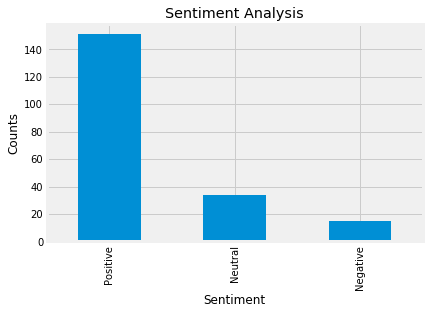